In this notebook the computed trajectories are visualized. 

# Import Libraries

In [1]:
import sys
sys.path.append("/home/felix/PycharmProjects/Quantum-Challenge/")
import pandas as pd
import xarray as xr
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import traceback
import math
import networkx as nx
import itertools
from qiskit.algorithms import AmplificationProblem
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover
from qiskit.circuit.library import GroverOperator
from qiskit.extensions import Initialize
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from itertools import product 
from qiskit.quantum_info import Statevector
import utils.utils as ut
from importlib import reload

# Load flight Data 

In [2]:
flight_df = pd.read_csv("../data/flights.csv", sep=";")

Visualize start and possible end points in the flight schedule.

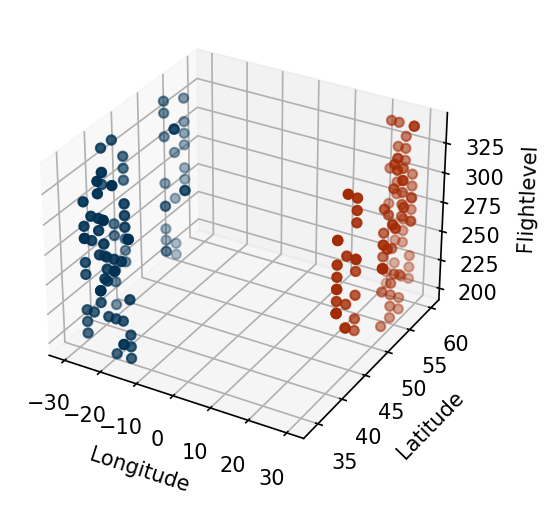

In [11]:
flight_dict = flight_df.to_dict()

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

x_s = np.fromiter(flight_dict["start_longitudinal"].values(), dtype=float)
y_s = np.fromiter(flight_dict["start_latitudinal"].values(), dtype=float)
z_s = np.fromiter(flight_dict["start_flightlevel"].values(), dtype=float)

x_e = np.fromiter(flight_dict["end_longitudinal"].values(), dtype=float)
y_e = np.fromiter(flight_dict["end_latitudinal"].values(), dtype=float)
z_e = np.fromiter(flight_dict["start_flightlevel"].values(), dtype=float)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Flightlevel")

ax.scatter(x_s, y_s, z_s,c="#003153")
ax.scatter(x_e, y_e, z_e, c="#A42A04")
plt.show()

# Load velocity and fuel consumption data

In [3]:
cruise_df = pd.read_pickle("../data/cruise_df.pkl")
climb_df = pd.read_pickle("../data/climb_df.pkl")
descent_df = pd.read_pickle("../data/descent_df.pkl")

# Load climate data

In [4]:
climate_df = pd.read_pickle("../data/climate_df.pkl")

# Classical non-optimized trajectory visualization

In [8]:
non_climate_traj = np.load("../data/non_climate_trajectory_arr.npy",allow_pickle=True)

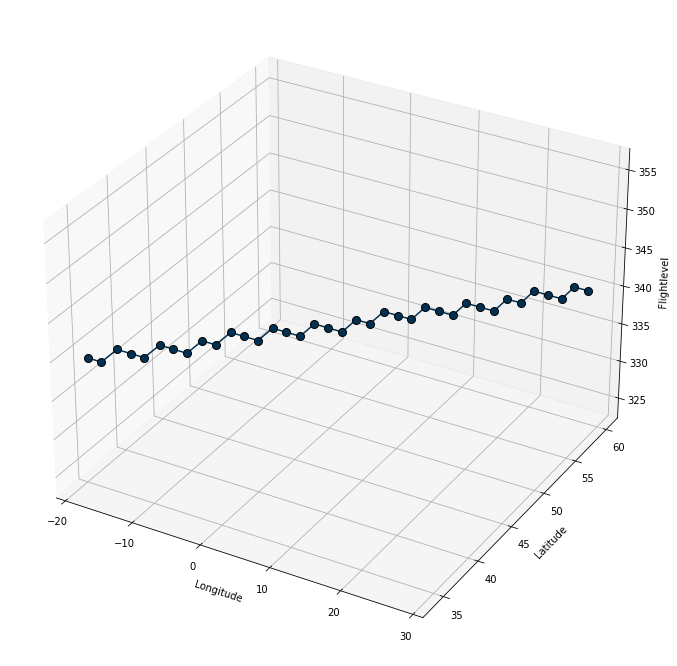

In [61]:
for traj in non_climate_traj: 
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Flightlevel")
    plot_x = [ temp["x"]  for temp in  traj ]
    plot_y = [ temp["y"]  for temp in  traj ]
    plot_z = [ temp["z"]  for temp in  traj ]
    ax.plot(plot_x, plot_y, plot_z,color="#003153",mec='black', marker="o", ms=8)
    plt.draw() 
    plt.pause(0.1)
    clear_output(wait=True)

# Classical optimized trajectory visualization

In [5]:
c_climate_traj = np.load("../data/c_climate_trajectory_arr.npy",allow_pickle=True)

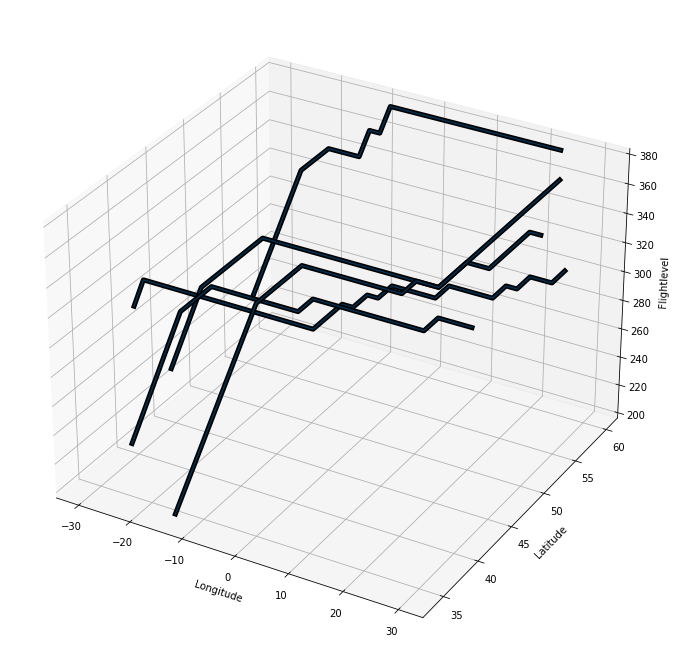

In [50]:
import matplotlib.patheffects as pe
_ = [c_climate_traj[0], c_climate_traj[-2], c_climate_traj[-3], c_climate_traj[-10], c_climate_traj[-18]]#, c_climate_traj[4], c_climate_traj[11], c_climate_traj[19]]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Flightlevel")
for traj in _: 
    plot_x = [ temp["x"]  for temp in  traj ]
    plot_y = [ temp["y"]  for temp in  traj ]
    plot_z = [ temp["z"]  for temp in  traj ]
    ax.plot(plot_x, plot_y, plot_z,color="#003153",mec='black', marker="o", ms=0,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])#[[0,0.1922,0.3255]])
plt.draw() 

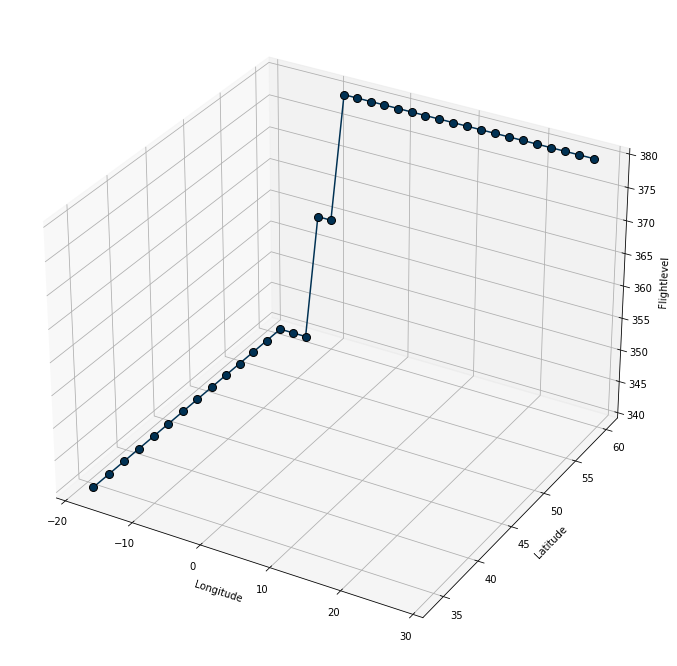

In [62]:
for traj in c_climate_traj: 
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Flightlevel")
    plot_x = [ temp["x"]  for temp in  traj ]
    plot_y = [ temp["y"]  for temp in  traj ]
    plot_z = [ temp["z"]  for temp in  traj ]
    ax.plot(plot_x, plot_y, plot_z,color="#003153",mec='black', marker="o", ms=8)
    plt.draw() 
    plt.pause(0.05)
    clear_output(wait=True)

# Quantum optimized trajectory visualization

In [64]:
q_climate_traj = np.load("../data/final_traj_arr.npy",allow_pickle=True)[:,1]

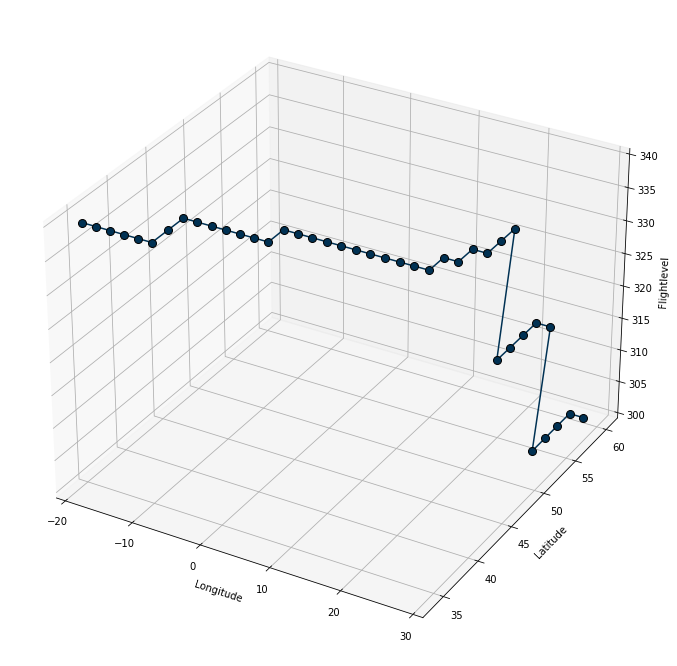

In [65]:
for traj in q_climate_traj: 
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Flightlevel")
    plot_x = [ temp["x"]  for temp in  traj ]
    plot_y = [ temp["y"]  for temp in  traj ]
    plot_z = [ temp["z"]  for temp in  traj ]
    ax.plot(plot_x, plot_y, plot_z,color="#003153",mec='black', marker="o", ms=8)
    plt.draw() 
    plt.pause(0.05)
    clear_output(wait=True)